1. Duomenų paruošimas

In [2]:
import pandas as pd

df1 = pd.read_csv("McDonald_s_Reviews.csv", encoding='cp1252')

df1.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [3]:
import re

# Pašaliname klaidingus simbolius ir taisome klaidingus pavadinimus
df1['store_name'] = df1['store_name'].replace({
    r'[^\x00-\x7F]+': '',  # Pašalina visus neskelbiamus simbolius
    'yyyMcDonald\'s': 'McDonald\'s',  # Pašalina klaidingus pavadinimus
    'McDonald\'s': 'McDonald\'s'  # Papildomas tikslinimas, jei yra klaidų su pavadinimu
}, regex=True)

# Patikriname unikalius restoranų pavadinimus
print(df1['store_name'].unique())


# Ištraukiame miestą ir valstiją iš store_address
def extract_location(address):
    try:
        parts = address.split(',')
        if len(parts) >= 3:
            city = parts[-3].strip()
            state = parts[-2].strip()
            city = re.sub(r'\d+', '', city).strip()
            state = re.sub(r'\d+', '', state).strip()
            return f"{city}, {state}"
        else:
            return ""
    except:
        return ""

df1['location'] = df1['store_address'].apply(extract_location)

# Ištraukti tik skaičių iš rating
df1['rating'] = df1['rating'].apply(lambda x: int(re.search(r'\d+', str(x)).group()) if pd.notnull(x) else None)

df_clean = df1[['store_name', 'location', 'review', 'rating']]

df_clean.head()


["McDonald's"]


,store_name,location,review,rating
0,McDonald's,"Austin, TX",Why does it look like someone spit on my food?...,1
1,McDonald's,"Austin, TX",It'd McDonalds. It is what it is as far as the...,4
2,McDonald's,"Austin, TX",Made a mobile order got to the speaker and che...,1
3,McDonald's,"Austin, TX",My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5
4,McDonald's,"Austin, TX","I repeat my order 3 times in the drive thru, a...",1


In [4]:
df2 = pd.read_csv("reviews_data.csv")

df2.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [5]:
# Tvarkome 2 lentelę:

df2['store_name'] = 'Starbucks'

df2['review'] = df2['Review']

df2['rating'] = df2['Rating']

df_clean2 = df2[['store_name', 'location', 'review', 'rating']]

df_clean2.head()

,store_name,location,review,rating
0,Starbucks,"Wichita Falls, TX",Amber and LaDonna at the Starbucks on Southwes...,5.0
1,Starbucks,"Apopka, FL",** at the Starbucks by the fire station on 436...,5.0
2,Starbucks,"Cranberry Twp, PA",I just wanted to go out of my way to recognize...,5.0
3,Starbucks,"Seattle, WA",Me and my friend were at Starbucks and my card...,5.0
4,Starbucks,"Gresham, OR",I’m on this kick of drinking 5 cups of warm wa...,5.0


In [6]:
# Sujungiam duomenis į vieną lentelę:

df_all = pd.concat([df_clean, df_clean2], ignore_index=True)

# Pašalinam stebėjimus, kur nėra reikšmių:
df_all = df_all.dropna()

df_all.head()

,store_name,location,review,rating
0,McDonald's,"Austin, TX",Why does it look like someone spit on my food?...,1.0
1,McDonald's,"Austin, TX",It'd McDonalds. It is what it is as far as the...,4.0
2,McDonald's,"Austin, TX",Made a mobile order got to the speaker and che...,1.0
3,McDonald's,"Austin, TX",My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5.0
4,McDonald's,"Austin, TX","I repeat my order 3 times in the drive thru, a...",1.0


In [7]:
df_all.tail()

,store_name,location,review,rating
34096,Starbucks,"Cotati, CA",I ordered Via Starbucks coffee online. I recei...,1.0
34097,Starbucks,"Oakville, ON","My name is Ric **, I am journalist by professi...",3.0
34098,Starbucks,"Ny, NY","The bagel was ice cold, not cut and not toasted.",1.0
34099,Starbucks,"La Puente, CA","In the morning of Monday, August 15, 2011, at ...",1.0
34145,Starbucks,"Beecher, IL",I found the coffee at Starbucks overrated and ...,5.0


2. Duomenų išvalymas

In [8]:
def clean_reviews(text):
    if pd.isnull(text):
        return ""
    # Pašalinti URL ir specialius simbolius
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Mažosios raidės
    text = text.lower()
    return text

# Pritaikymas
df_all['review'] = df_all['review'].apply(clean_reviews)

df_all['review'][:10]


0    why does it look like someone spit on my food\...
1    itd mcdonalds it is what it is as far as the f...
2    made a mobile order got to the speaker and che...
3    my mc crispy chicken sandwich was  customer se...
4    i repeat my order  times in the drive thru and...
5    i work for door dash and they locked us all ou...
6    if i  could give this location a zero on custo...
7    came in and ordered a large coffee wno ice the...
8    went thru drive thru ordered getting home noti...
9    im not really a huge fan of fast food but i ha...
Name: review, dtype: object

1 uždavinys 

In [9]:
#Su VADER:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

df_all['compound'] = df_all['review'].apply(lambda review: sid.polarity_scores(str(review))['compound'])

def sentiment_label(score):
    if score >= 0.05:
        return 'pos'
    elif score <= -0.05:
        return 'neg'
    else:
        return 'neu'

df_all['sentiment_vader'] = df_all['compound'].apply(sentiment_label)

df_all[['review', 'compound', 'sentiment_vader']].head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/darjabaranova/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,review,compound,sentiment_vader
0,why does it look like someone spit on my food\...,0.5215,pos
1,itd mcdonalds it is what it is as far as the f...,0.8687,pos
2,made a mobile order got to the speaker and che...,-0.3535,neg
3,my mc crispy chicken sandwich was customer se...,0.0000,neu
4,i repeat my order times in the drive thru and...,-0.8020,neg


In [10]:
#Su TextBlob:
from textblob import TextBlob

df_all['polarity'] = df_all['review'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)

def sentiment_label(score):
    if score >= 0.05:
        return 'pos'
    elif score <= -0.05:
        return 'neg'
    else:
        return 'neu'

df_all['sentiment_textblob'] = df_all['polarity'].apply(sentiment_label)

df_all[['review', 'polarity', 'sentiment_textblob']].head()


,review,polarity,sentiment_textblob
0,why does it look like someone spit on my food\...,0.216667,pos
1,itd mcdonalds it is what it is as far as the f...,0.326190,pos
2,made a mobile order got to the speaker and che...,-0.075000,neg
3,my mc crispy chicken sandwich was customer se...,-0.133333,neg
4,i repeat my order times in the drive thru and...,-0.041071,neu


In [11]:
#Priskiriam rating stulpeliui sentimentus:

def rating_to_sentiment(rating):
    if rating >= 4:
        return 'pos'
    elif rating <= 2:
        return 'neg'
    else:
        return 'neu'

df_all['rating_sentiment'] = df_all['rating'].apply(rating_to_sentiment)

df_all.head()

,store_name,location,review,rating,compound,sentiment_vader,polarity,sentiment_textblob,rating_sentiment
0,McDonald's,"Austin, TX",why does it look like someone spit on my food\...,1.0,0.5215,pos,0.216667,pos,neg
1,McDonald's,"Austin, TX",itd mcdonalds it is what it is as far as the f...,4.0,0.8687,pos,0.326190,pos,pos
2,McDonald's,"Austin, TX",made a mobile order got to the speaker and che...,1.0,-0.3535,neg,-0.075000,neg,neg
3,McDonald's,"Austin, TX",my mc crispy chicken sandwich was customer se...,5.0,0.0000,neu,-0.133333,neg,pos
4,McDonald's,"Austin, TX",i repeat my order times in the drive thru and...,1.0,-0.8020,neg,-0.041071,neu,neg


In [12]:
# Tikslumo palyginimas: 

from sklearn.metrics import accuracy_score

textblob_acc = accuracy_score(df_all['rating_sentiment'], df_all['sentiment_textblob'])
vader_acc = accuracy_score(df_all['rating_sentiment'], df_all['sentiment_vader'])

print(f'TextBlob Accuracy: {textblob_acc:.2f}')
print(f'VADER Accuracy: {vader_acc:.2f}')


TextBlob Accuracy: 0.68
VADER Accuracy: 0.70


VADER modelis šiek tiek tikslesnis, tad taikysime jį.

In [13]:
df_all['sentiment'] = df_all['sentiment_vader']
df_all = df_all[['store_name', 'location', 'review', 'rating', 'compound', 'sentiment']]

df_all.head()


,store_name,location,review,rating,compound,sentiment
0,McDonald's,"Austin, TX",why does it look like someone spit on my food\...,1.0,0.5215,pos
1,McDonald's,"Austin, TX",itd mcdonalds it is what it is as far as the f...,4.0,0.8687,pos
2,McDonald's,"Austin, TX",made a mobile order got to the speaker and che...,1.0,-0.3535,neg
3,McDonald's,"Austin, TX",my mc crispy chicken sandwich was customer se...,5.0,0.0000,neu
4,McDonald's,"Austin, TX",i repeat my order times in the drive thru and...,1.0,-0.8020,neg


2 uždavinys


In [14]:
sentiment_distribution = df_all.groupby(['store_name', 'sentiment']).size().unstack(fill_value=0)

# Apskaičiuojame procentus kiekvienam sentimentui
sentiment_distribution_percentage = sentiment_distribution.div(sentiment_distribution.sum(axis=1), axis=0) * 100

# Rodyti procentus
print(sentiment_distribution_percentage)


sentiment         neg        neu        pos
store_name                                 
McDonald's  28.889687  18.852557  52.257755
Starbucks   48.794326   3.404255  47.801418


In [15]:
from scipy.stats import chi2_contingency

# Sukuriame kontingencijos lentelę (nuotaikos x restoranai)
contingency_table = sentiment_distribution.values

# Atliksime chi-kvadrato testą
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Rezultatai
print(f"Chi-kvadrato testas: p reikšmė = {p}")


Chi-kvadrato testas: p reikšmė = 7.109146046718304e-41


Pagal chi-kvadrato testą galime nustatyti ar nuotaikų pasiskirstymas skirtinguose restuoranuose atsitiktinis ar ne, kadangi mūsų gautas rezutatas mažesnis nei 0,05, dėl to galime teigti, kad restoranų atsiliepimų nuotaikos nėra atsitiktinės. 

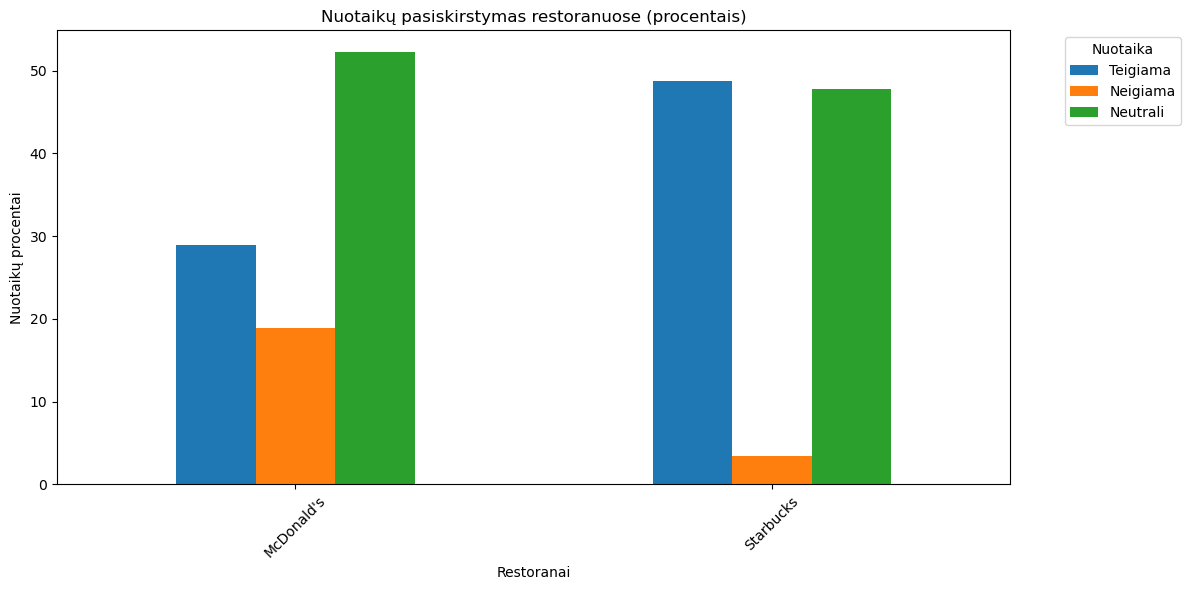

In [16]:
import matplotlib.pyplot as plt

# Suskaičiuokime nuotaikų pasiskirstymą visiems restoranams
sentiment_distribution = df_all.groupby(['store_name', 'sentiment']).size().unstack(fill_value=0)

# Apskaičiuojame procentus kiekvienam sentimentui
sentiment_distribution_percentage = sentiment_distribution.div(sentiment_distribution.sum(axis=1), axis=0) * 100

# Pavaizduojame nuotaikų pasiskirstymą barų diagramoje su atskirais stulpeliais
sentiment_distribution_percentage.plot(kind='bar', figsize=(12, 6))

plt.title('Nuotaikų pasiskirstymas restoranuose (procentais)')
plt.xlabel('Restoranai')
plt.ylabel('Nuotaikų procentai')
plt.xticks(rotation=45)
plt.legend(title="Nuotaika", labels=["Teigiama", "Neigiama", "Neutrali"], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




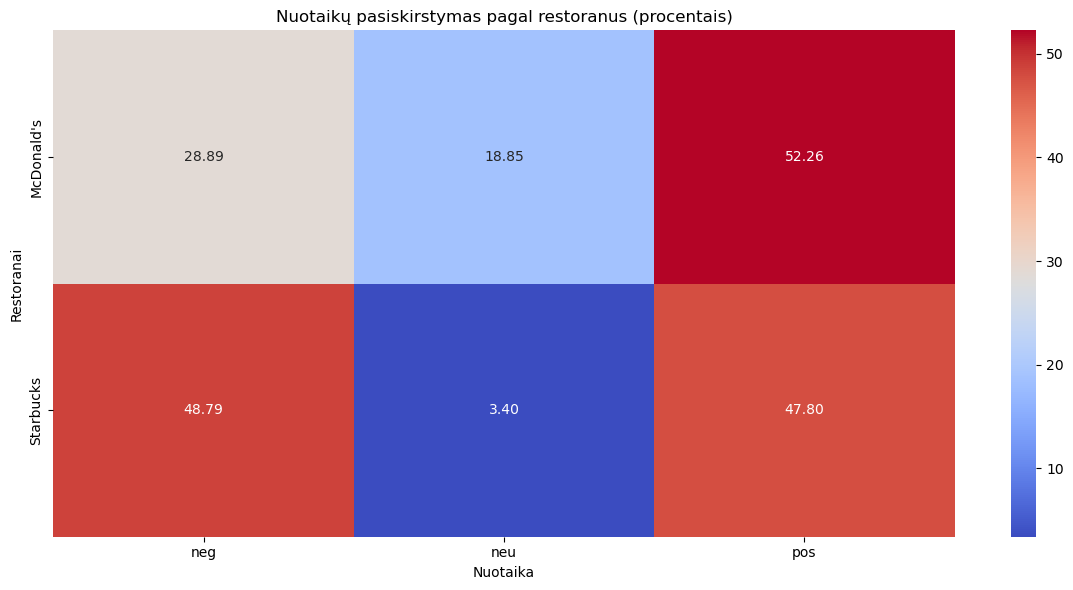

In [17]:

import seaborn as sns

# Sukuriame heatmap vizualizaciją su procentais
plt.figure(figsize=(12, 6))
sns.heatmap(sentiment_distribution_percentage, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

plt.title('Nuotaikų pasiskirstymas pagal restoranus (procentais)')
plt.xlabel('Nuotaika')
plt.ylabel('Restoranai')
plt.tight_layout()
plt.show()


4 uždavinys


In [18]:
#!pip install wordcloud matplotlib
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [19]:
# Žodžiai, kuriuos norime pašalinti
words_to_remove = ["mcdonald's", "food", "order", "place", "mcdonalds", "one"]

def remove_words(text, words):
    pattern = r'\b(' + '|'.join(re.escape(w) for w in words) + r')\b'
    return re.sub(pattern, '', text, flags=re.IGNORECASE)

# Teigiami atsiliepimai
positive_text = " ".join(df_all[df_all["sentiment"] == "pos"]["review"].astype(str))
positive_text = remove_words(positive_text, words_to_remove)

# Neigiami atsiliepimai
negative_text = " ".join(df_all[df_all["sentiment"] == "neg"]["review"].astype(str))
negative_text = remove_words(negative_text, words_to_remove)


In [20]:
# Debesis teigiamiems
wordcloud_pos = WordCloud(width=800, height=400, background_color="white", colormap="Greens").generate(positive_text)

# Debesis neigiamiems
wordcloud_neg = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(negative_text)


In [21]:
stopwords = set(STOPWORDS)

mask_heart = np.array(Image.open("heart.png"))
mask_cloud = np.array(Image.open("cloud.png"))

mask_cloud = 255 - mask_cloud
mask_heart = 255 - mask_heart

# Teigiamų atsiliepimų debesis
plt.figure(figsize=(11, 7))
wordcloud_pos = WordCloud(
    stopwords=stopwords,
    width=1200,
    height=800,
    background_color="white",
    mask=mask_heart,        
    random_state=42,
    colormap="viridis",
    max_words=500,
    contour_color='white',
    contour_width=1.5
).generate(positive_text)

plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Teigiamų atsiliepimų žodžių debesis", fontsize=17)
plt.tight_layout(pad=0)
#plt.savefig("positive_wordcloud.png", dpi=300, bbox_inches="tight")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'heart.png'

In [22]:
# Neigiamų atsiliepimų debesis
plt.figure(figsize=(12, 8))
wordcloud_neg = WordCloud(
    stopwords=stopwords,
    width=1200,
    height=800,
    background_color="white",
    mask=mask_cloud, 
    random_state=42,
    colormap="magma",
    max_words=500,
    contour_color='white',
    contour_width=1.5
).generate(negative_text)

plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Neigiamų atsiliepimų žodžių debesis", fontsize=20)
plt.tight_layout(pad=0)
#plt.savefig("negative_wordcloud.png", dpi=300, bbox_inches="tight")
plt.show()


NameError: name 'mask_cloud' is not defined

<Figure size 1200x800 with 0 Axes>

Vidutinis žodžių skaičius pagal nuotaiką:
sentiment
neg    36.198859
neu     9.939399
pos    20.482939
Name: review_length, dtype: float64


/var/folders/m2/thhzrcx561s2c0pkd3rm0t2m0000gn/T/ipykernel_14405/105596340.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_length_by_sentiment.index,


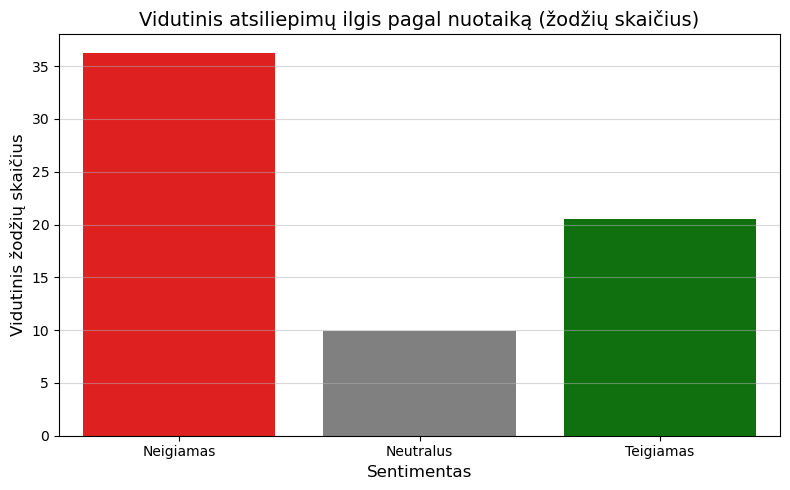


--- Analizės rezultatai (pakartotinai) ---
Vidutinis žodžių skaičius pagal nuotaiką:
sentiment
neg    36.198859
neu     9.939399
pos    20.482939
Name: review_length, dtype: float64
F-statistic: 1345.21, p-value: 0.0000
Skirtumas tarp grupių reikšmingas – nuotaikos priklauso nuo atsiliepimo ilgio.


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway


#  Atsiliepimų ilgio skaičiavimas
# Pridedame stulpelį su žodžių skaičiumi
df_all['review_length'] = df_all['review'].apply(lambda x: len(str(x).split()))

# Vidutinio ilgio apskaičiavimas pagal nuotaiką
avg_length_by_sentiment = df_all.groupby('sentiment')['review_length'].mean()
print("Vidutinis žodžių skaičius pagal nuotaiką:")
print(avg_length_by_sentiment)
# Stulpelinė diagrama
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_length_by_sentiment.index, 
            y=avg_length_by_sentiment.values,
            palette={'neg': 'red', 'neu': 'gray', 'pos': 'green'})

plt.title('Vidutinis atsiliepimų ilgis pagal nuotaiką (žodžių skaičius)', fontsize=14)
plt.xlabel('Sentimentas', fontsize=12)
plt.ylabel('Vidutinis žodžių skaičius', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['Neigiamas', 'Neutralus', 'Teigiamas'])
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

#  ANOVA rezultatai 

print("\n--- Analizės rezultatai (pakartotinai) ---")
print("Vidutinis žodžių skaičius pagal nuotaiką:")
print(avg_length_by_sentiment)
print(f"F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Skirtumas tarp grupių reikšmingas – nuotaikos priklauso nuo atsiliepimo ilgio.")
else:
    print("Skirtumas tarp grupių nereikšmingas – nuotaikos nepriklauso nuo atsiliepimo ilgio.")